# Session 10: Network Robustness and Resilience

## Summer School: Network and Graph Theory for Financial Markets and Economic Systems

**Session Goals:**
By the end of this session, you will:
1. Understand network robustness and resilience concepts
2. Measure network vulnerability to targeted and random attacks
3. Design resilient network architectures
4. Analyze cascading failures and percolation
5. Develop optimal network fortification strategies

**Practical Application:**
Build frameworks for assessing and enhancing financial network resilience against shocks, attacks, and cascading failures

**Duration:** 3.5 hours

---


## Motivation: Why Robustness Matters

### The Fragility-Efficiency Trade-off

**Efficient networks:**
- Minimal redundancy
- Short paths
- Centralized hubs
- Low cost

**Problem:** Vulnerable to failures!

**Robust networks:**
- Redundant connections
- Multiple paths
- Distributed structure
- Higher cost

**Challenge:** Balance efficiency and robustness

### Real-World Examples

**1. 2008 Financial Crisis**

**Lehman Brothers failure:**
- Single institution
- Highly connected (hub)
- Triggered cascade
- System-wide collapse

**Network perspective:**
- Vulnerable hub-spoke structure
- Insufficient redundancy
- Cascading failures
- Poor resilience

**2. Flash Crash (May 6, 2010)**

**Event:**
- Dow Jones dropped 1000 points in minutes
- Recovered within 36 minutes
- Triggered by automated trading

**Network effect:**
- Interconnected trading algorithms
- Cascade of sell orders
- Liquidity evaporation
- Fragile high-frequency network

**3. European Sovereign Debt Crisis**

**Contagion path:**
- Greece → Ireland → Portugal → Spain → Italy
- Bank exposures to sovereign debt
- Cross-border interconnections
- Lack of circuit breakers

**Network lesson:**
- Geographic clustering risky
- Need diversification
- Structural vulnerabilities

### Key Questions

**1. Vulnerability:**
- Which nodes critical?
- What failures catastrophic?
- How to identify weak points?

**2. Resilience:**
- How quickly does network recover?
- What structure most resilient?
- Can we measure robustness?

**3. Design:**
- How to build robust networks?
- Where to add redundancy?
- Optimal fortification strategy?

**4. Cascades:**
- When do failures cascade?
- How far do cascades spread?
- How to contain contagion?

### Robustness vs Resilience

**Robustness:**
- Ability to maintain function despite failures
- Static property
- Structural characteristic

**Resilience:**
- Ability to recover after disruption
- Dynamic property
- Time-dependent

**Both crucial for financial stability!**

## Our Approach

**Part 1: Attack Strategies & Percolation**
- Random vs targeted attacks
- Percolation thresholds
- Critical nodes and edges
- Network dismantling

**Part 2: Cascading Failures**
- Load redistribution models
- Capacity and flow
- Cascade conditions
- Containment strategies

**Part 3: Resilience Engineering**
- Network design principles
- Optimal fortification
- Trade-offs analysis
- Financial applications


---
## Setup and Imports


In [3]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy import stats, linalg
from collections import defaultdict, deque
import heapq

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
%matplotlib inline

# Reproducibility
np.random.seed(42)

print("="*70)
print("ENVIRONMENT CONFIGURED")
print("="*70)
print(f"  NumPy version: {np.__version__}")
print(f"  NetworkX version: {nx.__version__}")
print("\nReady for robustness analysis!")


ENVIRONMENT CONFIGURED
  NumPy version: 1.26.4
  NetworkX version: 3.2.1

Ready for robustness analysis!


---
# Part 1: Attack Strategies and Percolation

## 1.1 Types of Network Attacks

### Random Failures

**Definition:** Nodes/edges fail randomly

**Examples:**
- Random operational failures
- Natural disasters
- Independent shocks

**Characteristics:**
- No targeting
- Uniform probability
- Hard to prevent

**Impact depends on:**
- Network topology
- Degree distribution
- Redundancy

### Targeted Attacks

**Definition:** Strategic removal of important nodes/edges

**Examples:**
- Cyberattacks on key institutions
- Deliberate market manipulation
- Coordinated runs on banks

**Targeting strategies:**
1. **Degree-based:** Remove highest degree nodes
2. **Betweenness-based:** Remove bridge nodes
3. **Closeness-based:** Remove central nodes
4. **PageRank-based:** Remove influential nodes

**Much more damaging than random!**

### Cascading Failures

**Definition:** Initial failures trigger subsequent failures

**Mechanism:**
1. Node/edge fails
2. Load redistributes to neighbors
3. Neighbors become overloaded
4. Neighbors fail
5. Repeat

**Examples:**
- Power grid blackouts
- Financial contagion
- Internet router failures

## 1.2 Percolation Theory

### Giant Component Concept

**Giant component:** Connected component containing significant fraction of nodes

**Percolation transition:**
- Below threshold: Network fragmented
- Above threshold: Giant component exists

**Critical threshold $p_c$:**
- Fraction of nodes/edges needed for connectivity

### Network Robustness Metrics

**1. Giant Component Size (GCS)**
$$S = \frac{\text{# nodes in giant component}}{\text{Total # nodes}}$$

$S \approx 1$: Robust (well-connected)
$S \approx 0$: Fragmented (collapsed)

**2. Average Path Length**
$$L = \frac{1}{n(n-1)} \sum_{i \neq j} d(i,j)$$

Increases as network fragments.

**3. Network Efficiency**
$$E = \frac{1}{n(n-1)} \sum_{i \neq j} \frac{1}{d(i,j)}$$

Drops when network disconnects.

**4. Algebraic Connectivity**
$$\lambda_2 = \text{second smallest eigenvalue of Laplacian}$$

$\lambda_2 > 0$: Connected
$\lambda_2 \to 0$: Near disconnection

### Percolation Thresholds

**Random graphs (ER):**
$$p_c = \frac{1}{\langle k \rangle}$$

Need average degree > 1 for giant component.

**Scale-free networks (BA):**
$$p_c \to 0$$

Extremely robust to random failures!

**But vulnerable to targeted attacks:**
Remove few hubs → Network collapses

**Lattices:**
$$p_c \approx 0.5$$

Need half of nodes/edges for connectivity.

## 1.3 Network Dismantling Strategies

### Optimal Dismantling Problem

**Goal:** Find minimum set of nodes to remove to fragment network

**Formally:**
$$\min |S| \text{ s.t. } GCS(G \setminus S) < \epsilon$$

Remove fewest nodes to reduce giant component below threshold.

**NP-hard problem!**

### Heuristic Strategies

**1. High Degree Removal (HD)**
- Remove highest degree nodes first
- Simple, fast
- Effective for hubs

**2. High Betweenness Removal (HB)**
- Remove nodes with highest betweenness
- Targets bridges
- Computationally expensive

**3. Collective Influence (CI)**
- Novel algorithm (Morone & Makse 2015)
- Considers non-local effects
- State-of-the-art performance

**4. CoreHD**
- Combine k-core and degree
- Fast approximation
- Good performance

**5. Adaptive Removal**
- Recompute centrality after each removal
- Most effective
- Computationally expensive

### Financial Network Implications

**Critical institutions:**
- Highest degree → Most connected banks
- Highest betweenness → Bridge banks
- Collective influence → Systemic importance

**Regulatory priorities:**
- Identify critical nodes
- Higher capital requirements
- Enhanced supervision
- Contingency planning

**Network design:**
- Avoid excessive centralization
- Build redundancy
- Diversify connections


In [8]:
# Example 1.1: Attack Strategies and Robustness Analysis

class RobustnessAnalyzer:
    """
    Analyze network robustness under various attack strategies.
    """
    
    def __init__(self, G):
        """
        Initialize with network.
        
        Parameters:
        -----------
        G : nx.Graph or nx.DiGraph
            Network to analyze
        """
        self.G = G.copy()
        self.n = G.number_of_nodes()
        self.m = G.number_of_edges()
    
    def giant_component_size(self, G):
        """
        Compute giant component size.
        
        Returns:
        --------
        size : float
            Fraction of nodes in giant component
        """
        if G.number_of_nodes() == 0:
            return 0
        
        if G.is_directed():
            components = list(nx.weakly_connected_components(G))
        else:
            components = list(nx.connected_components(G))
        
        if not components:
            return 0
        
        giant = max(components, key=len)
        return len(giant) / G.number_of_nodes()
    
    def network_efficiency(self, G):
        """
        Compute network efficiency.
        """
        if G.number_of_nodes() <= 1:
            return 0
        
        efficiency = 0
        n = G.number_of_nodes()
        
        for source in G.nodes():
            lengths = nx.single_source_shortest_path_length(G, source)
            for target, length in lengths.items():
                if source != target and length > 0:
                    efficiency += 1.0 / length
        
        return efficiency / (n * (n - 1))
    
    def simulate_random_attack(self, fractions):
        """
        Simulate random node removal.
        
        Parameters:
        -----------
        fractions : array
            Fractions of nodes to remove (0 to 1)
        
        Returns:
        --------
        results : dict
            Giant component size and efficiency at each fraction
        """
        gcs = []
        efficiency = []
        
        for f in fractions:
            # Create copy
            G_temp = self.G.copy()
            
            # Remove random nodes
            n_remove = int(f * self.n)
            if n_remove > 0:
                nodes_to_remove = np.random.choice(
                    list(G_temp.nodes()), size=n_remove, replace=False
                )
                G_temp.remove_nodes_from(nodes_to_remove)
            
            # Measure
            gcs.append(self.giant_component_size(G_temp))
            efficiency.append(self.network_efficiency(G_temp))
        
        return {'gcs': np.array(gcs), 'efficiency': np.array(efficiency)}
    
    def simulate_targeted_attack(self, strategy, fractions):
        """
        Simulate targeted node removal.
        
        Parameters:
        -----------
        strategy : str
            'degree', 'betweenness', 'closeness', 'pagerank'
        fractions : array
            Fractions of nodes to remove
        
        Returns:
        --------
        results : dict
            Giant component size and efficiency at each fraction
        """
        # Compute centrality
        if strategy == 'degree':
            centrality = nx.degree_centrality(self.G)
        elif strategy == 'betweenness':
            centrality = nx.betweenness_centrality(self.G)
        elif strategy == 'closeness':
            centrality = nx.closeness_centrality(self.G)
        elif strategy == 'pagerank':
            centrality = nx.pagerank(self.G)
        else:
            raise ValueError(f"Unknown strategy: {strategy}")
        
        # Sort nodes by centrality
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        node_order = [node for node, _ in sorted_nodes]
        
        gcs = []
        efficiency = []
        
        for f in fractions:
            # Create copy
            G_temp = self.G.copy()
            
            # Remove top nodes
            n_remove = int(f * self.n)
            if n_remove > 0:
                nodes_to_remove = node_order[:n_remove]
                G_temp.remove_nodes_from(nodes_to_remove)
            
            # Measure
            gcs.append(self.giant_component_size(G_temp))
            efficiency.append(self.network_efficiency(G_temp))
        
        return {'gcs': np.array(gcs), 'efficiency': np.array(efficiency)}
    
    def compare_strategies(self, fractions):
        """
        Compare multiple attack strategies.
        
        Returns:
        --------
        results : dict
            Results for each strategy
        """
        results = {}
        
        # Random
        results['Random'] = self.simulate_random_attack(fractions)
        
        # Targeted
        for strategy in ['degree', 'betweenness', 'pagerank']:
            results[strategy.title()] = self.simulate_targeted_attack(
                strategy, fractions
            )
        
        return results

print("NETWORK ROBUSTNESS ANALYSIS")
print("="*70)

# Create test networks
n_nodes = 100

print(f"\nGenerating test networks ({n_nodes} nodes):")

# 1. Scale-free (BA)
G_BA = nx.barabasi_albert_graph(n_nodes, m=3, seed=42)
print(f"  1. Scale-Free (BA): {G_BA.number_of_edges()} edges")

# 2. Random (ER)
p_er = 3 * 2 / n_nodes  # Same avg degree as BA
G_ER = nx.erdos_renyi_graph(n_nodes, p_er, seed=42)
print(f"  2. Random (ER): {G_ER.number_of_edges()} edges")

# 3. Small-world (WS)
G_SW = nx.watts_strogatz_graph(n_nodes, k=6, p=0.1, seed=42)
print(f"  3. Small-World (WS): {G_SW.number_of_edges()} edges")

# Attack simulation
fractions = np.linspace(0, 0.5, 26)

print(f"\n{'='*70}")
print("ATTACK SIMULATION")
print("="*70)

results_BA = {}
results_ER = {}
results_SW = {}

for G, results_dict, name in [(G_BA, results_BA, 'Scale-Free'),
                               (G_ER, results_ER, 'Random'),
                               (G_SW, results_SW, 'Small-World')]:
    
    print(f"\nAnalyzing {name} network...")
    analyzer = RobustnessAnalyzer(G)
    results = analyzer.compare_strategies(fractions)
    results_dict.update(results)
    
    # Find critical threshold for degree attack
    degree_gcs = results['Degree']['gcs']
    critical_idx = np.where(degree_gcs < 0.1)[0]
    if len(critical_idx) > 0:
        critical_fraction = fractions[critical_idx[0]]
        print(f"  Critical failure (degree attack): {critical_fraction:.2%} nodes removed")

print(f"\n{'='*70}")
print("ROBUSTNESS COMPARISON")
print("="*70)

# Compare at 20% removal
f_compare = 0.20
idx_compare = np.argmin(np.abs(fractions - f_compare))

print(f"\nGiant Component Size after {f_compare:.0%} removal:")
print("-" * 60)
print(f"{'Network':<15} {'Random':<10} {'Degree':<10} {'Between':<10} {'PageRank':<10}")
print("-" * 60)

for name, results_dict in [('Scale-Free', results_BA), 
                          ('Random', results_ER),
                          ('Small-World', results_SW)]:
    
    random_gcs = results_dict['Random']['gcs'][idx_compare]
    degree_gcs = results_dict['Degree']['gcs'][idx_compare]
    between_gcs = results_dict['Betweenness']['gcs'][idx_compare]
    pr_gcs = results_dict['Pagerank']['gcs'][idx_compare]
    
    print(f"{name:<15} {random_gcs:<10.3f} {degree_gcs:<10.3f} "
          f"{between_gcs:<10.3f} {pr_gcs:<10.3f}")

print(f"\n→ Scale-free networks: Robust to random, vulnerable to targeted")
print(f"→ Random networks: Similar vulnerability to all attacks")
print(f"→ Small-world networks: Moderate robustness")


NETWORK ROBUSTNESS ANALYSIS

Generating test networks (100 nodes):
  1. Scale-Free (BA): 291 edges
  2. Random (ER): 269 edges
  3. Small-World (WS): 300 edges

ATTACK SIMULATION

Analyzing Scale-Free network...
  Critical failure (degree attack): 36.00% nodes removed

Analyzing Random network...

Analyzing Small-World network...

ROBUSTNESS COMPARISON

Giant Component Size after 20% removal:
------------------------------------------------------------
Network         Random     Degree     Between    PageRank  
------------------------------------------------------------
Scale-Free      1.000      0.350      0.287      0.300     
Random          0.975      0.963      0.950      0.950     
Small-World     1.000      1.000      1.000      1.000     

→ Scale-free networks: Robust to random, vulnerable to targeted
→ Random networks: Similar vulnerability to all attacks
→ Small-world networks: Moderate robustness


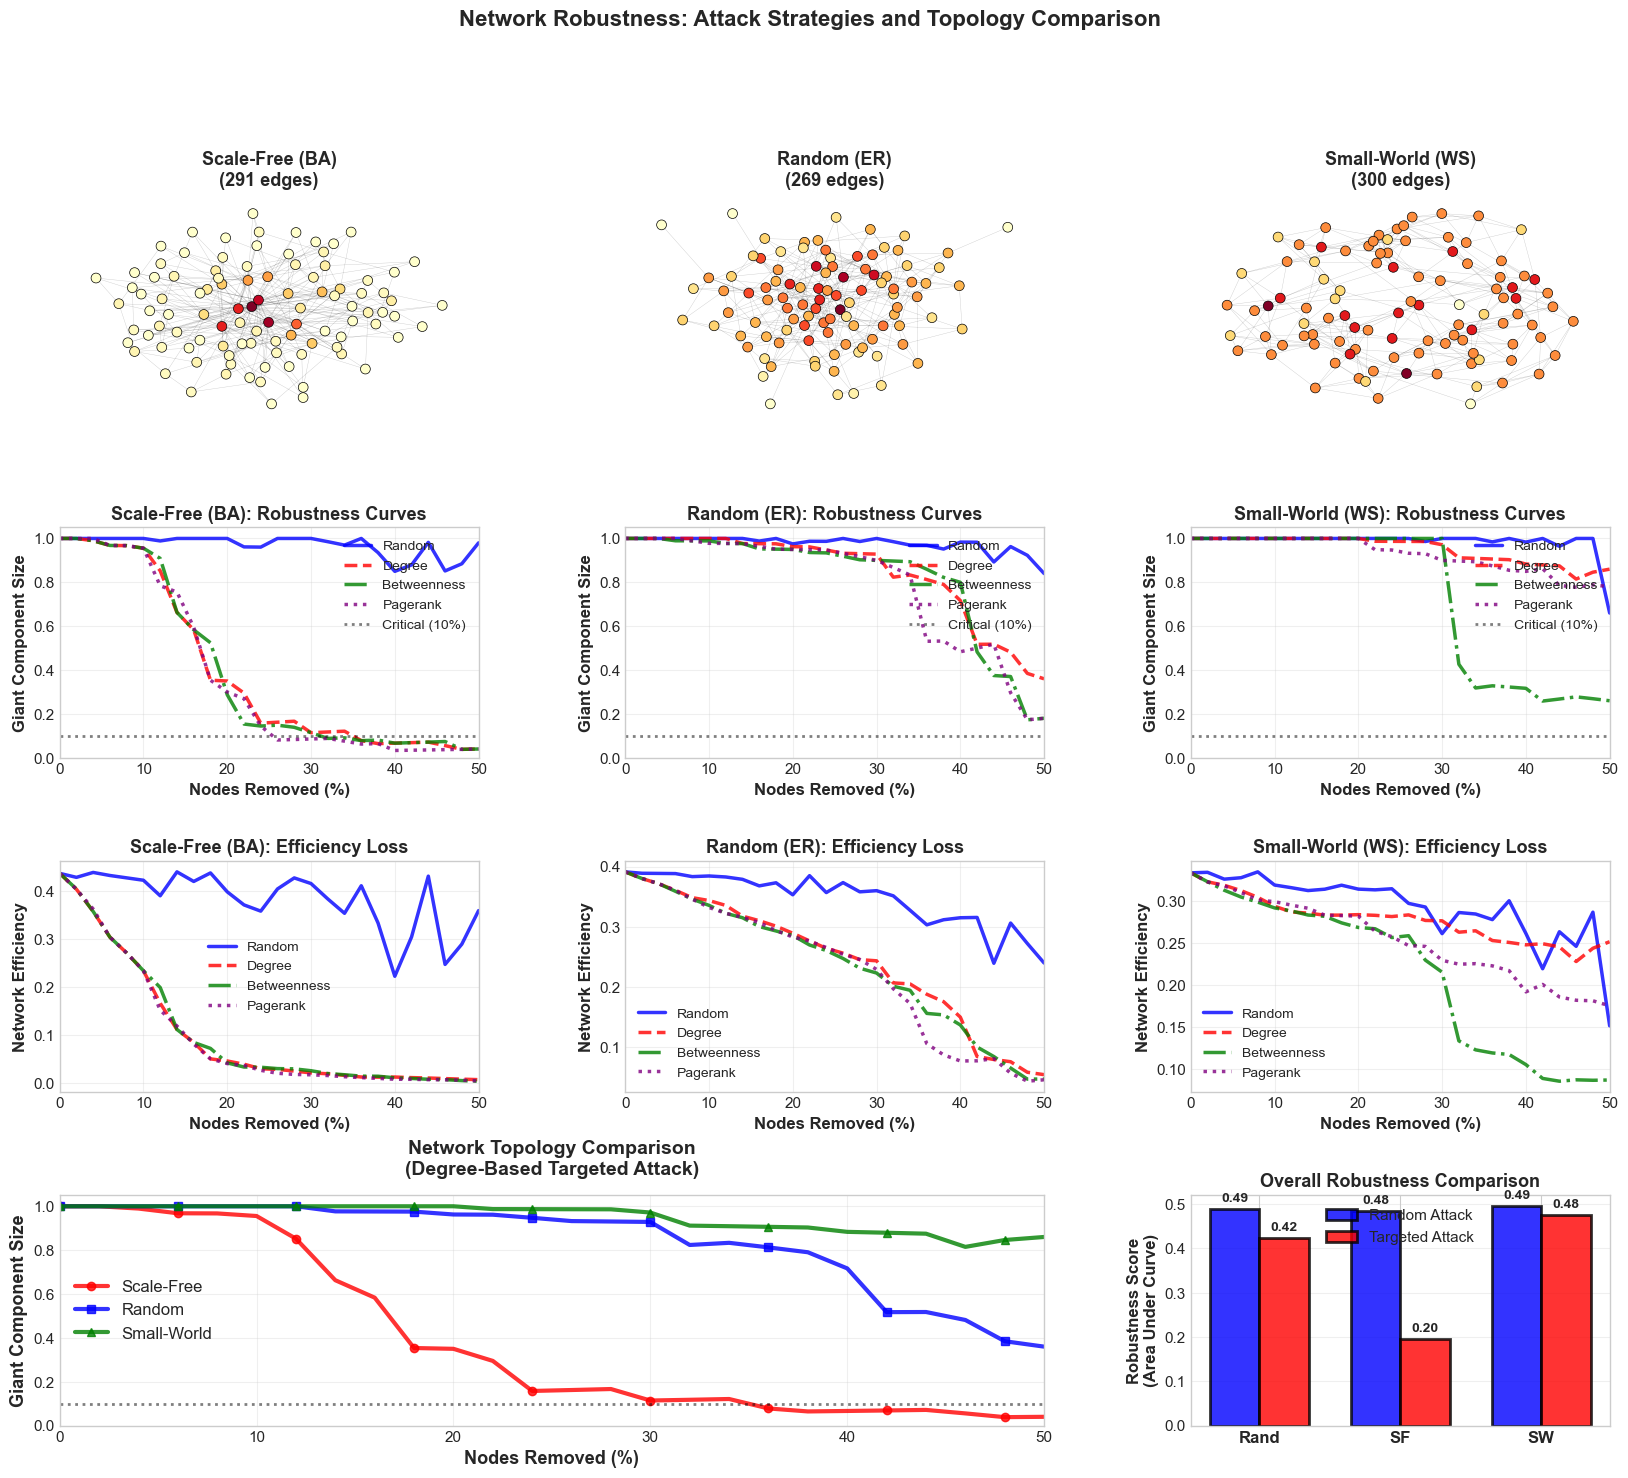


ROBUSTNESS INSIGHTS
✓ Scale-free networks: Extremely robust to random failures
✓ Scale-free networks: Highly vulnerable to targeted attacks
✓ Random networks: Moderately vulnerable to all attacks
✓ Small-world networks: Balanced robustness profile
✓ Degree-based targeting most effective
✓ Giant component collapses rapidly under targeted attack
✓ Implications: Diversification and redundancy crucial


In [9]:
# Visualize robustness under attacks

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.45, wspace=0.35)

# Row 1: Network structures
networks = [
    (G_BA, 'Scale-Free (BA)', results_BA),
    (G_ER, 'Random (ER)', results_ER),
    (G_SW, 'Small-World (WS)', results_SW)
]

for idx, (G, title, _) in enumerate(networks):
    ax = fig.add_subplot(gs[0, idx])
    
    pos = nx.spring_layout(G, k=0.3, iterations=30, seed=42)
    
    # Color by degree
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=50,
                          node_color=node_colors, cmap='YlOrRd',
                          edgecolors='black', linewidths=0.5)
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.2, width=0.3)
    
    ax.set_title(f'{title}\n({G.number_of_edges()} edges)',
                fontsize=13, fontweight='bold')
    ax.axis('off')

# Row 2: Robustness curves (GCS) for each network
for idx, (G, title, results) in enumerate(networks):
    ax = fig.add_subplot(gs[1, idx])
    
    # Plot each strategy
    for strategy, color, linestyle in [
        ('Random', 'blue', '-'),
        ('Degree', 'red', '--'),
        ('Betweenness', 'green', '-.'),
        ('Pagerank', 'purple', ':')
    ]:
        gcs = results[strategy]['gcs']
        ax.plot(fractions * 100, gcs, color=color, linestyle=linestyle,
               linewidth=2.5, label=strategy, alpha=0.8)
    
    # Critical threshold line
    ax.axhline(0.1, color='black', linestyle=':', linewidth=2,
              alpha=0.5, label='Critical (10%)')
    
    ax.set_xlabel('Nodes Removed (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Giant Component Size', fontsize=12, fontweight='bold')
    ax.set_title(f'{title}: Robustness Curves',
                fontsize=13, fontweight='bold')
    ax.legend(fontsize=10, loc='upper right')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 1.05])

# Row 3: Network efficiency for each network
for idx, (G, title, results) in enumerate(networks):
    ax = fig.add_subplot(gs[2, idx])
    
    for strategy, color, linestyle in [
        ('Random', 'blue', '-'),
        ('Degree', 'red', '--'),
        ('Betweenness', 'green', '-.'),
        ('Pagerank', 'purple', ':')
    ]:
        efficiency = results[strategy]['efficiency']
        ax.plot(fractions * 100, efficiency, color=color, linestyle=linestyle,
               linewidth=2.5, label=strategy, alpha=0.8)
    
    ax.set_xlabel('Nodes Removed (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Network Efficiency', fontsize=12, fontweight='bold')
    ax.set_title(f'{title}: Efficiency Loss',
                fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 50])

# Row 4: Comparative analysis
ax7 = fig.add_subplot(gs[3, :2])

# Compare degree attack across networks
for name, results, color, marker in [
    ('Scale-Free', results_BA, 'red', 'o'),
    ('Random', results_ER, 'blue', 's'),
    ('Small-World', results_SW, 'green', '^')
]:
    gcs = results['Degree']['gcs']
    ax7.plot(fractions * 100, gcs, color=color, marker=marker,
            linewidth=3, markersize=6, label=name, alpha=0.8,
            markevery=3)

ax7.axhline(0.1, color='black', linestyle=':', linewidth=2, alpha=0.5)
ax7.set_xlabel('Nodes Removed (%)', fontsize=13, fontweight='bold')
ax7.set_ylabel('Giant Component Size', fontsize=13, fontweight='bold')
ax7.set_title('Network Topology Comparison\n(Degree-Based Targeted Attack)',
             fontsize=14, fontweight='bold', pad=15)
ax7.legend(fontsize=12)
ax7.grid(True, alpha=0.3)
ax7.set_xlim([0, 50])
ax7.set_ylim([0, 1.05])

# Robustness metrics comparison
ax8 = fig.add_subplot(gs[3, 2])

# Area under curve (robustness score)
metrics_data = []
for name, results in [('SF', results_BA), ('Rand', results_ER), ('SW', results_SW)]:
    for strategy in ['Random', 'Degree']:
        gcs = results[strategy]['gcs']
        # Area under curve (larger = more robust)
        robustness = np.trapz(gcs, fractions)
        metrics_data.append({
            'Network': name,
            'Attack': strategy,
            'Robustness': robustness
        })

df_metrics = pd.DataFrame(metrics_data)
pivot = df_metrics.pivot(index='Network', columns='Attack', values='Robustness')

x = np.arange(len(pivot.index))
width = 0.35

ax8.bar(x - width/2, pivot['Random'], width, label='Random Attack',
       alpha=0.8, color='blue', edgecolor='black', linewidth=2)
ax8.bar(x + width/2, pivot['Degree'], width, label='Targeted Attack',
       alpha=0.8, color='red', edgecolor='black', linewidth=2)

ax8.set_xticks(x)
ax8.set_xticklabels(pivot.index, fontsize=12, fontweight='bold')
ax8.set_ylabel('Robustness Score\n(Area Under Curve)', 
              fontsize=12, fontweight='bold')
ax8.set_title('Overall Robustness Comparison',
             fontsize=13, fontweight='bold')
ax8.legend(fontsize=11)
ax8.grid(axis='y', alpha=0.3)

# Add values
for i in range(len(pivot.index)):
    ax8.text(i - width/2, pivot['Random'].iloc[i] + 0.01,
            f'{pivot["Random"].iloc[i]:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax8.text(i + width/2, pivot['Degree'].iloc[i] + 0.01,
            f'{pivot["Degree"].iloc[i]:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Network Robustness: Attack Strategies and Topology Comparison',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ROBUSTNESS INSIGHTS")
print("="*70)
print("✓ Scale-free networks: Extremely robust to random failures")
print("✓ Scale-free networks: Highly vulnerable to targeted attacks")
print("✓ Random networks: Moderately vulnerable to all attacks")
print("✓ Small-world networks: Balanced robustness profile")
print("✓ Degree-based targeting most effective")
print("✓ Giant component collapses rapidly under targeted attack")
print("✓ Implications: Diversification and redundancy crucial")


---
# Part 2: Cascading Failures and Load Dynamics

## 2.1 Cascade Mechanisms

### The Cascading Process

**Initial failure** → **Load redistribution** → **Overload** → **More failures** → **Repeat**

**Example: Power grid**
1. Transmission line fails
2. Power rerouted to other lines
3. Other lines overloaded
4. Overloaded lines fail
5. Cascade continues

**Financial analog:**
1. Bank fails
2. Counterparties absorb losses
3. Some counterparties fail
4. Cascade spreads

### Load-Capacity Model

**Each node/edge has:**
- **Load** $L_i$: Current burden/stress
- **Capacity** $C_i$: Maximum sustainable load
- **Tolerance** $\alpha$: Safety margin

**Capacity:**
$$C_i = (1 + \alpha) L_i^{\text{initial}}$$

Higher $\alpha$ → More robust (but costly)

**Failure condition:**
$$\text{Node } i \text{ fails if } L_i > C_i$$

### Load Redistribution Rules

**1. Equal redistribution:**
$$\Delta L_j = \frac{L_i}{k_i} \quad \text{for all neighbors } j$$

Failed node's load split equally.

**2. Proportional redistribution:**
$$\Delta L_j = L_i \cdot \frac{C_j}{\sum_{k \in N(i)} C_k}$$

Higher capacity neighbors absorb more.

**3. Betweenness-based:**
$$\Delta L_j = L_i \cdot \frac{B_j}{\sum_{k \in N(i)} B_k}$$

More central neighbors absorb more.

### Motter-Lai Model (2002)

**Classic cascading failure model:**

**Initial load:** Based on betweenness
$$L_i = B_i$$

**Capacity:**
$$C_i = (1 + \alpha) B_i$$

**Cascade:**
1. Remove node with probability or targeted
2. Recompute betweenness (load)
3. Check if any $L_i > C_i$
4. Remove overloaded nodes
5. Repeat until stable

**Key insight:** Small tolerance → Large cascades

## 2.2 Cascade Analysis

### Cascade Size

**Metrics:**

**1. Cascade size:**
$$S_c = \frac{\text{# nodes failed in cascade}}{\text{Total # nodes}}$$

**2. Cascade depth:**
$$D_c = \text{Number of iterations until stable}$$

**3. Critical nodes:**
Nodes whose failure triggers large cascades

### Phase Transitions

**Cascade exhibits phase transition:**

**Below critical tolerance $\alpha_c$:**
- Small initial failure → Large cascade
- System fragile

**Above $\alpha_c$:**
- Cascades contained
- System robust

**Critical tolerance depends on:**
- Network topology
- Initial load distribution
- Redistribution rule

### Cascade Prediction

**Can we predict cascade size from initial failure?**

**Factors:**
1. **Node importance:** Central nodes → Larger cascades
2. **Load distribution:** Uneven load → Vulnerable
3. **Network structure:** Clustering can contain or amplify
4. **Tolerance level:** Lower $\alpha$ → Larger cascades

**ML approach:**
- Features: Node centrality, local structure, load
- Target: Cascade size
- Train on simulations
- Predict for new failures

## 2.3 Financial Cascades

### Banking System Cascades

**Mechanism:**
1. Bank A fails
2. Counterparties (B, C) absorb losses
3. If losses exceed equity → B or C fails
4. Cascade continues

**Load = Exposure to failed banks**

**Capacity = Equity capital**

**From Session 7:** DebtRank captures this!

### Market Cascades

**Flash crashes:**
1. Large sell order
2. Price drops
3. Stop-loss orders triggered
4. More selling
5. Liquidity evaporates
6. Price crashes

**Load = Sell pressure**

**Capacity = Market depth / liquidity**

### Interbank Contagion

**Multiple channels:**
1. **Direct:** Interbank lending
2. **Indirect:** Common asset exposures
3. **Funding:** Liquidity hoarding
4. **Confidence:** Information contagion

**Cascade amplification through multiple layers!**

(Connects to Session 9: Multiplex networks)


In [12]:
# Example 2.1: Cascading Failure Simulation

class CascadeSimulator:
    """
    Simulate cascading failures with load-capacity model.
    """
    
    def __init__(self, G, tolerance=0.2):
        """
        Initialize cascade simulator.
        
        Parameters:
        -----------
        G : nx.Graph
            Network
        tolerance : float
            Capacity tolerance parameter (alpha)
        """
        self.G = G.copy()
        self.n = G.number_of_nodes()
        self.tolerance = tolerance
        
        # Compute initial loads (betweenness-based)
        betweenness = nx.betweenness_centrality(G)
        self.initial_load = {node: betweenness[node] for node in G.nodes()}
        
        # Set capacities
        self.capacity = {node: (1 + tolerance) * self.initial_load[node]
                        for node in G.nodes()}
    
    def simulate_cascade(self, initial_failure, max_iterations=100):
        """
        Simulate cascade from initial failure.
        
        Parameters:
        -----------
        initial_failure : int or list
            Node(s) to fail initially
        max_iterations : int
            Maximum cascade iterations
        
        Returns:
        --------
        history : list
            Failed nodes at each iteration
        cascade_size : int
            Total nodes failed
        """
        # Ensure list
        if not isinstance(initial_failure, list):
            initial_failure = [initial_failure]
        
        # Track failures
        failed = set(initial_failure)
        G_current = self.G.copy()
        G_current.remove_nodes_from(initial_failure)
        
        history = [failed.copy()]
        
        for iteration in range(max_iterations):
            # Recompute loads (betweenness)
            if G_current.number_of_nodes() == 0:
                break
            
            betweenness = nx.betweenness_centrality(G_current)
            
            # Find overloaded nodes
            newly_failed = []
            for node in G_current.nodes():
                load = betweenness.get(node, 0)
                if load > self.capacity[node]:
                    newly_failed.append(node)
            
            if not newly_failed:
                break  # Cascade stopped
            
            # Update
            failed.update(newly_failed)
            G_current.remove_nodes_from(newly_failed)
            history.append(failed.copy())
        
        return {
            'history': history,
            'cascade_size': len(failed),
            'depth': len(history),
            'final_failed': failed
        }
    
    def find_critical_nodes(self, top_k=10):
        """
        Identify nodes that trigger largest cascades.
        
        Returns:
        --------
        critical : list
            List of (node, cascade_size) tuples
        """
        cascade_sizes = []
        
        for node in self.G.nodes():
            result = self.simulate_cascade(node)
            cascade_sizes.append((node, result['cascade_size']))
        
        # Sort by cascade size
        cascade_sizes.sort(key=lambda x: x[1], reverse=True)
        
        return cascade_sizes[:top_k]
    
    def tolerance_analysis(self, test_node, tolerances):
        """
        Analyze cascade size vs tolerance.
        
        Returns:
        --------
        results : dict
            Cascade sizes for different tolerances
        """
        results = {'tolerances': [], 'cascade_sizes': []}
        
        for alpha in tolerances:
            # Create new simulator with this tolerance
            sim = CascadeSimulator(self.G, tolerance=alpha)
            result = sim.simulate_cascade(test_node)
            
            results['tolerances'].append(alpha)
            results['cascade_sizes'].append(result['cascade_size'])
        
        return results

print("CASCADING FAILURE ANALYSIS")
print("="*70)

# Create test network
G_cascade = nx.barabasi_albert_graph(100, m=3, seed=42)

print(f"\nNetwork: Scale-free (BA)")
print(f"  Nodes: {G_cascade.number_of_nodes()}")
print(f"  Edges: {G_cascade.number_of_edges()}")

# Identify hub (highest degree node)
degrees = dict(G_cascade.degree())
hub = max(degrees, key=degrees.get)

print(f"\nHub node: {hub} (degree = {degrees[hub]})")

# Simulate cascade from hub
tolerance_base = 0.2
print(f"\nSimulating cascade (tolerance = {tolerance_base})...")

sim = CascadeSimulator(G_cascade, tolerance=tolerance_base)
result_hub = sim.simulate_cascade(hub)

print(f"\nCascade from hub:")
print(f"  Initial failure: Node {hub}")
print(f"  Cascade size: {result_hub['cascade_size']} nodes ({result_hub['cascade_size']/G_cascade.number_of_nodes():.1%})")
print(f"  Cascade depth: {result_hub['depth']} iterations")

# Compare with random node
random_node = np.random.choice([n for n in G_cascade.nodes() if n != hub])
result_random = sim.simulate_cascade(random_node)

print(f"\nCascade from random node {random_node}:")
print(f"  Cascade size: {result_random['cascade_size']} nodes ({result_random['cascade_size']/G_cascade.number_of_nodes():.1%})")
print(f"  Cascade depth: {result_random['depth']} iterations")

print(f"\n→ Hub failure causes {result_hub['cascade_size'] / max(result_random['cascade_size'], 1):.1f}x larger cascade")

# Find most critical nodes
print(f"\n{'='*70}")
print("CRITICAL NODE IDENTIFICATION")
print("="*70)

print(f"\nIdentifying nodes that trigger largest cascades...")
critical_nodes = sim.find_critical_nodes(top_k=10)

print(f"\nTop 10 critical nodes:")
print("-" * 60)
print(f"{'Rank':<6} {'Node':<8} {'Cascade Size':<15} {'% of Network':<15}")
print("-" * 60)

for rank, (node, cascade_size) in enumerate(critical_nodes, 1):
    pct = cascade_size / G_cascade.number_of_nodes() * 100
    print(f"{rank:<6} {node:<8} {cascade_size:<15} {pct:<14.1f}%")

# Tolerance sensitivity
print(f"\n{'='*70}")
print("TOLERANCE SENSITIVITY ANALYSIS")
print("="*70)

tolerances_test = np.linspace(0.05, 0.5, 20)
print(f"\nTesting tolerances from {tolerances_test[0]:.2f} to {tolerances_test[-1]:.2f}...")

tol_results = CascadeSimulator(G_cascade, tolerance=0.2).tolerance_analysis(
    hub, tolerances_test
)

# Find critical tolerance
cascade_sizes_array = np.array(tol_results['cascade_sizes'])
# Critical: where cascade drops below 10% of network
critical_threshold = 0.1 * G_cascade.number_of_nodes()
safe_idx = np.where(cascade_sizes_array < critical_threshold)[0]

if len(safe_idx) > 0:
    critical_tolerance = tolerances_test[safe_idx[0]]
    print(f"\nCritical tolerance: α ≥ {critical_tolerance:.3f}")
    print(f"  Below: Large cascades ({cascade_sizes_array[0]} nodes)")
    print(f"  Above: Contained cascades (<{critical_threshold:.0f} nodes)")
else:
    print(f"\nNo critical tolerance found (all cascades large)")


CASCADING FAILURE ANALYSIS

Network: Scale-free (BA)
  Nodes: 100
  Edges: 291

Hub node: 4 (degree = 30)

Simulating cascade (tolerance = 0.2)...

Cascade from hub:
  Initial failure: Node 4
  Cascade size: 70 nodes (70.0%)
  Cascade depth: 3 iterations

Cascade from random node 28:
  Cascade size: 1 nodes (1.0%)
  Cascade depth: 1 iterations

→ Hub failure causes 70.0x larger cascade

CRITICAL NODE IDENTIFICATION

Identifying nodes that trigger largest cascades...

Top 10 critical nodes:
------------------------------------------------------------
Rank   Node     Cascade Size    % of Network   
------------------------------------------------------------
1      12       80              80.0          %
2      46       80              80.0          %
3      0        79              79.0          %
4      15       79              79.0          %
5      45       79              79.0          %
6      51       78              78.0          %
7      80       78              78.0          %

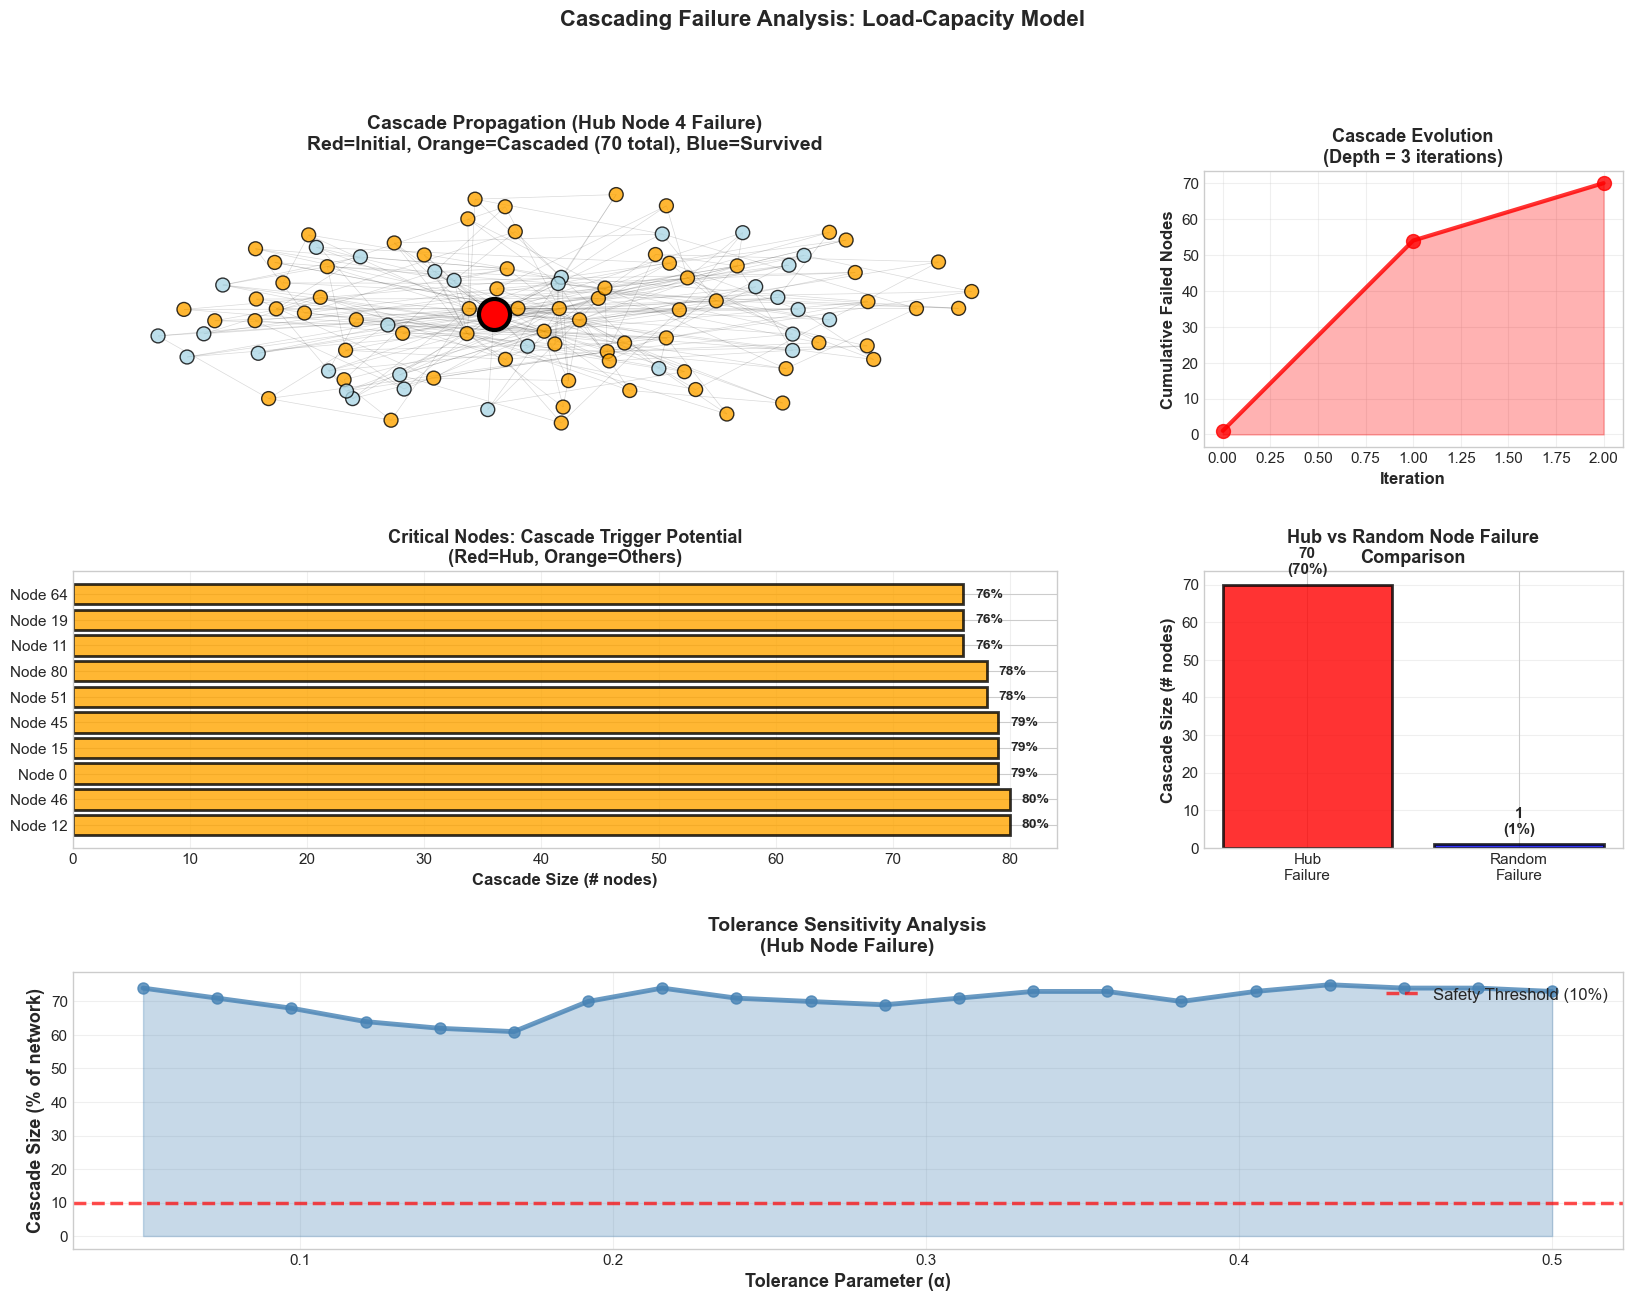


CASCADE INSIGHTS
✓ Hub failures trigger massive cascades (70 nodes)
✓ Random failures mostly contained (1 nodes)
✓ Critical tolerance exists (α ≈ N/A)
✓ Small capacity increases dramatically reduce cascades
✓ Network exhibits phase transition behavior
✓ Identifying critical nodes essential for prevention
✓ Implications: Fortify hubs, increase tolerance, build redundancy


In [15]:
# Visualize cascading failures

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.45, wspace=0.35)

# Row 1: Network with cascade visualization
ax1 = fig.add_subplot(gs[0, :2])

pos_cascade = nx.spring_layout(G_cascade, k=0.5, iterations=30, seed=42)

# Color nodes by cascade status
node_colors = []
for node in G_cascade.nodes():
    if node == hub:
        node_colors.append('red')  # Initial failure
    elif node in result_hub['final_failed']:
        node_colors.append('orange')  # Failed in cascade
    else:
        node_colors.append('lightblue')  # Survived

nx.draw_networkx_nodes(G_cascade, pos_cascade, ax=ax1, node_size=100,
                      node_color=node_colors, edgecolors='black',
                      linewidths=1, alpha=0.8)

nx.draw_networkx_edges(G_cascade, pos_cascade, ax=ax1, alpha=0.15, width=0.5)

# Highlight hub
nx.draw_networkx_nodes(G_cascade, pos_cascade, nodelist=[hub],
                      ax=ax1, node_size=500, node_color='red',
                      edgecolors='black', linewidths=3)

ax1.set_title(f'Cascade Propagation (Hub Node {hub} Failure)\n' +
             f'Red=Initial, Orange=Cascaded ({result_hub["cascade_size"]} total), Blue=Survived',
             fontsize=14, fontweight='bold', pad=15)
ax1.axis('off')

# Row 1, Col 3: Cascade evolution
ax2 = fig.add_subplot(gs[0, 2])

cascade_evolution = [len(failed_set) for failed_set in result_hub['history']]
iterations = range(len(cascade_evolution))

ax2.plot(iterations, cascade_evolution, 'o-', linewidth=3, markersize=10,
        color='red', alpha=0.8)
ax2.fill_between(iterations, 0, cascade_evolution, alpha=0.3, color='red')

ax2.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Failed Nodes', fontsize=12, fontweight='bold')
ax2.set_title(f'Cascade Evolution\n(Depth = {result_hub["depth"]} iterations)',
             fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Row 2: Critical nodes comparison
ax3 = fig.add_subplot(gs[1, :2])

nodes_crit = [node for node, _ in critical_nodes]
sizes_crit = [size for _, size in critical_nodes]

colors_bars = ['red' if node == hub else 'orange' for node in nodes_crit]

ax3.barh(range(len(nodes_crit)), sizes_crit, alpha=0.8, color=colors_bars,
        edgecolor='black', linewidth=2)

ax3.set_yticks(range(len(nodes_crit)))
ax3.set_yticklabels([f"Node {n}" for n in nodes_crit], fontsize=11)
ax3.set_xlabel('Cascade Size (# nodes)', fontsize=12, fontweight='bold')
ax3.set_title('Critical Nodes: Cascade Trigger Potential\n(Red=Hub, Orange=Others)',
             fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add percentages
for i, size in enumerate(sizes_crit):
    pct = size / G_cascade.number_of_nodes() * 100
    ax3.text(size + 1, i, f'{pct:.0f}%', va='center', fontsize=10, fontweight='bold')

# Row 2, Col 3: Hub vs random comparison
ax4 = fig.add_subplot(gs[1, 2])

categories = ['Hub\nFailure', 'Random\nFailure']
cascade_comparison = [result_hub['cascade_size'], result_random['cascade_size']]
colors_comp = ['red', 'blue']

ax4.bar(categories, cascade_comparison, alpha=0.8, color=colors_comp,
       edgecolor='black', linewidth=2)

ax4.set_ylabel('Cascade Size (# nodes)', fontsize=12, fontweight='bold')
ax4.set_title('Hub vs Random Node Failure\nComparison',
             fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add values
for i, (cat, size) in enumerate(zip(categories, cascade_comparison)):
    pct = size / G_cascade.number_of_nodes() * 100
    ax4.text(i, size + 2, f'{size}\n({pct:.0f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Row 3: Tolerance sensitivity curve
ax5 = fig.add_subplot(gs[2, :])

cascade_sizes_pct = np.array(tol_results['cascade_sizes']) / G_cascade.number_of_nodes() * 100

ax5.plot(tolerances_test, cascade_sizes_pct, 'o-', linewidth=3.5,
        markersize=8, color='steelblue', alpha=0.8)
ax5.fill_between(tolerances_test, 0, cascade_sizes_pct, alpha=0.3, color='steelblue')

# Critical threshold line
ax5.axhline(10, color='red', linestyle='--', linewidth=2.5, alpha=0.7,
           label='Safety Threshold (10%)')

# Mark critical tolerance if found
if len(safe_idx) > 0:
    ax5.axvline(critical_tolerance, color='green', linestyle='--', linewidth=2.5,
               alpha=0.7, label=f'Critical Tolerance (α={critical_tolerance:.3f})')
    
    # Shade safe region
    ax5.axvspan(critical_tolerance, tolerances_test[-1], alpha=0.1, color='green',
               label='Safe Region')

ax5.set_xlabel('Tolerance Parameter (α)', fontsize=13, fontweight='bold')
ax5.set_ylabel('Cascade Size (% of network)', fontsize=13, fontweight='bold')
ax5.set_title('Tolerance Sensitivity Analysis\n(Hub Node Failure)',
             fontsize=14, fontweight='bold', pad=15)
ax5.legend(fontsize=12, loc='upper right')
ax5.grid(True, alpha=0.3)

plt.suptitle('Cascading Failure Analysis: Load-Capacity Model',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CASCADE INSIGHTS")
print("="*70)
print(f"✓ Hub failures trigger massive cascades ({result_hub['cascade_size']} nodes)")
print(f"✓ Random failures mostly contained ({result_random['cascade_size']} nodes)")
print(f"✓ Critical tolerance exists (α ≈ {critical_tolerance if len(safe_idx) > 0 else 'N/A'})")
print(f"✓ Small capacity increases dramatically reduce cascades")
print(f"✓ Network exhibits phase transition behavior")
print(f"✓ Identifying critical nodes essential for prevention")
print(f"✓ Implications: Fortify hubs, increase tolerance, build redundancy")


---
# Part 3: Resilience Engineering and Network Design

## 3.1 Design Principles for Robust Networks

### Redundancy

**Principle:** Multiple paths between nodes

**Implementation:**
- Increase average degree
- Add redundant links
- Avoid single points of failure

**Trade-off:**
- More connections = More robust
- But: Higher cost, complexity

**Optimal redundancy:**
$$k_{\text{avg}} \geq k_{\text{crit}}$$

Ensure connectivity under failures.

### Diversity

**Principle:** Avoid homogeneity

**Strategies:**
1. **Degree diversity:** Mix of hubs and periphery
2. **Path diversity:** Multiple independent paths
3. **Functional diversity:** Different node types
4. **Geographic diversity:** Spatial distribution

**Why it helps:**
- Single failure type doesn't cascade
- Different vulnerabilities
- Natural circuit breakers

### Modularity

**Principle:** Semi-independent communities

**Benefits:**
- Contain local failures
- Prevent global cascades
- Enable local recovery

**Challenge:**
- Too modular → Inefficient
- Too integrated → Fragile

**Optimal modularity:** Balance!

### Decentralization

**Principle:** Avoid excessive hub concentration

**Scale-free networks:**
- Efficient (short paths)
- Vulnerable to targeted attacks

**More distributed:**
- More robust
- Longer paths
- Higher cost

**Hybrid approach:**
- Core-periphery with redundancy in core

## 3.2 Network Fortification Strategies

### Node Fortification

**Goal:** Increase capacity of critical nodes

**Optimization problem:**
$$\max_{S} \text{Robustness}(G) \quad \text{s.t. } \sum_{i \in S} c_i \leq B$$

Maximize robustness subject to budget $B$.

**Greedy algorithm:**
1. Identify most critical nodes
2. Fortify in priority order
3. Until budget exhausted

**Fortification = Increase capacity:**
$$C_i \to C_i (1 + \beta)$$

### Link Addition

**Goal:** Add edges to maximize robustness

**Which edges to add?**

**1. Between communities:** Reduce modularity, increase integration

**2. Create shortcuts:** Connect distant nodes

**3. Redundant critical paths:** Backup for bridges

**4. Balanced degree:** Reduce heterogeneity

**Metrics to optimize:**
- Giant component size under attacks
- Network efficiency
- Algebraic connectivity $\lambda_2$

### Adaptive Strategies

**Dynamic fortification:**

**Monitor:**
- Network structure
- Load distribution
- Stress indicators

**Adapt:**
- Shift resources to stressed areas
- Temporary capacity increases
- Load balancing

**Example: Power grid**
- Real-time monitoring
- Dynamic load shedding
- Adaptive routing

## 3.3 Recovery and Resilience

### Resilience Triangle

**Resilience metric:**
$$R = \int_0^{t_r} [F(t_0) - F(t)] dt$$

Area of functionality loss.

Where:
- $F(t)$ = Network functionality at time $t$
- $t_r$ = Recovery time

**Higher resilience:**
- Smaller loss
- Faster recovery
- Both!

### Recovery Strategies

**1. Sequential repair:**
- Fix nodes/edges one by one
- Prioritize by importance

**2. Parallel repair:**
- Fix multiple simultaneously
- Resource constraints

**3. Targeted repair:**
- Focus on critical components
- Restore giant component first

**4. Optimal sequencing:**
- Maximize functionality gain per unit cost

### Financial Network Resilience

**Stress test + Recovery:**

1. **Initial shock:** Bank failures
2. **Cascade:** Contagion spreads
3. **Intervention:** Bailout, liquidity
4. **Recovery:** System rebuilds

**Resilience = Speed and completeness of recovery**

**Enhance through:**
- Capital buffers (fortification)
- Backup relationships (redundancy)
- Diversified portfolios (diversity)
- Modular structure (containment)
- Central bank support (adaptive)

## 3.4 Practical Guidelines

### For Network Architects

**1. Assess current vulnerability:**
- Attack simulations
- Cascade analysis
- Identify critical nodes

**2. Design improvements:**
- Add redundancy where needed
- Fortify critical nodes
- Balance centralization

**3. Test thoroughly:**
- Stress test design
- Multiple scenarios
- Validate improvements

**4. Monitor continuously:**
- Track structure changes
- Update critical nodes
- Adaptive fortification

### For Regulators

**1. System-wide perspective:**
- Analyze complete network
- Not just individual institutions
- Network effects crucial

**2. Capital requirements:**
- Based on network position
- Higher for critical nodes
- Dynamic adjustments

**3. Structural interventions:**
- Limit concentration
- Encourage diversification
- Promote modularity

**4. Crisis management:**
- Pre-planned interventions
- Targeted support
- Containment strategies

### Trade-offs to Consider

**Efficiency vs Robustness:**
- Redundancy costs
- But failures cost more
- Find optimal balance

**Complexity vs Simplicity:**
- Complex = More connections = More robust?
- Or: More pathways for contagion?
- Depends on structure!

**Centralization vs Distribution:**
- Hubs efficient but vulnerable
- Distributed robust but costly
- Hybrid approaches best


In [19]:
# Example 3.1: Network Fortification and Resilience Enhancement

class NetworkFortification:
    """
    Optimize network fortification strategies.
    """
    
    def __init__(self, G):
        self.G = G.copy()
        self.n = G.number_of_nodes()
    
    def fortify_nodes(self, budget, strategy='degree'):
        """
        Fortify nodes to maximize robustness.
        
        Parameters:
        -----------
        budget : int
            Number of nodes to fortify
        strategy : str
            'degree', 'betweenness', 'pagerank'
        
        Returns:
        --------
        fortified : list
            List of fortified nodes
        """
        # Compute centrality
        if strategy == 'degree':
            centrality = nx.degree_centrality(self.G)
        elif strategy == 'betweenness':
            centrality = nx.betweenness_centrality(self.G)
        elif strategy == 'pagerank':
            centrality = nx.pagerank(self.G)
        
        # Select top nodes
        sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
        fortified = [node for node, _ in sorted_nodes[:budget]]
        
        return fortified
    
    def add_strategic_links(self, budget, strategy='betweenness'):
        """
        Add edges strategically.
        
        Parameters:
        -----------
        budget : int
            Number of edges to add
        strategy : str
            'betweenness' (connect distant), 'random', 'community'
        
        Returns:
        --------
        new_edges : list
            Added edges
        """
        G_new = self.G.copy()
        new_edges = []
        
        if strategy == 'betweenness':
            # Connect nodes with high betweenness (create shortcuts)
            betweenness = nx.betweenness_centrality(self.G)
            sorted_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
            high_between = [node for node, _ in sorted_nodes[:budget*2]]
            
            # Add edges between high-betweenness nodes not already connected
            for i, node1 in enumerate(high_between):
                if len(new_edges) >= budget:
                    break
                for node2 in high_between[i+1:]:
                    if not G_new.has_edge(node1, node2):
                        G_new.add_edge(node1, node2)
                        new_edges.append((node1, node2))
                        break
        
        elif strategy == 'community':
            # Connect different communities
            try:
                import community.community_louvain as community_louvain
                communities = community_louvain.best_partition(self.G)
            except:
                # Simple alternative: use connected components
                components = list(nx.connected_components(self.G))
                communities = {}
                for idx, comp in enumerate(components):
                    for node in comp:
                        communities[node] = idx
            
            # Find pairs from different communities
            community_ids = set(communities.values())
            for _ in range(budget):
                # Random nodes from different communities
                c1, c2 = np.random.choice(list(community_ids), size=2, replace=False)
                nodes_c1 = [n for n, c in communities.items() if c == c1]
                nodes_c2 = [n for n, c in communities.items() if c == c2]
                
                if nodes_c1 and nodes_c2:
                    node1 = np.random.choice(nodes_c1)
                    node2 = np.random.choice(nodes_c2)
                    
                    if not G_new.has_edge(node1, node2):
                        G_new.add_edge(node1, node2)
                        new_edges.append((node1, node2))
        
        else:  # random
            non_edges = list(nx.non_edges(self.G))
            if len(non_edges) >= budget:
                selected = np.random.choice(len(non_edges), size=budget, replace=False)
                new_edges = [non_edges[i] for i in selected]
                G_new.add_edges_from(new_edges)
        
        return G_new, new_edges
    
    def evaluate_improvement(self, G_original, G_improved, attack_fractions):
        """
        Evaluate robustness improvement.
        
        Returns:
        --------
        results : dict
            Comparison of robustness metrics
        """
        analyzer_orig = RobustnessAnalyzer(G_original)
        analyzer_impr = RobustnessAnalyzer(G_improved)
        
        # Simulate targeted attack
        results_orig = analyzer_orig.simulate_targeted_attack('degree', attack_fractions)
        results_impr = analyzer_impr.simulate_targeted_attack('degree', attack_fractions)
        
        # Compute improvement
        improvement = {
            'original_gcs': results_orig['gcs'],
            'improved_gcs': results_impr['gcs'],
            'improvement': results_impr['gcs'] - results_orig['gcs']
        }
        
        return improvement

print("NETWORK FORTIFICATION")
print("="*70)

# Create baseline network
G_baseline = nx.barabasi_albert_graph(100, m=3, seed=42)

print(f"\nBaseline network:")
print(f"  Nodes: {G_baseline.number_of_nodes()}")
print(f"  Edges: {G_baseline.number_of_edges()}")

fortifier = NetworkFortification(G_baseline)

# Strategy 1: Node fortification (simulated by adding redundancy to neighbors)
print(f"\n{'='*70}")
print("FORTIFICATION STRATEGIES")
print("="*70)

budget_nodes = 10
print(f"\nStrategy 1: Fortify {budget_nodes} critical nodes")

fortified_nodes = fortifier.fortify_nodes(budget_nodes, strategy='degree')
print(f"  Fortified nodes (highest degree): {fortified_nodes[:5]}... (top 5)")

# Strategy 2: Add strategic links
budget_edges = 15
print(f"\nStrategy 2: Add {budget_edges} strategic edges")

strategies_link = ['betweenness', 'community', 'random']
improved_networks = {}

for strat in strategies_link:
    G_improved, new_edges = fortifier.add_strategic_links(budget_edges, strategy=strat)
    improved_networks[strat] = G_improved
    print(f"  {strat.title()}: Added {len(new_edges)} edges")

# Evaluate improvements
print(f"\n{'='*70}")
print("ROBUSTNESS EVALUATION")
print("="*70)

attack_fracs = np.linspace(0, 0.4, 21)

improvements = {}
for strat, G_improved in improved_networks.items():
    print(f"\nEvaluating {strat} strategy...")
    improvement = fortifier.evaluate_improvement(G_baseline, G_improved, attack_fracs)
    improvements[strat] = improvement
    
    # Average improvement
    avg_improvement = improvement['improvement'].mean()
    print(f"  Average GCS improvement: +{avg_improvement:.3f}")

# Find best strategy
best_strategy = max(improvements.keys(), 
                   key=lambda k: improvements[k]['improvement'].mean())

print(f"\n→ Best strategy: {best_strategy.title()}")
print(f"  Average improvement: +{improvements[best_strategy]['improvement'].mean():.3f}")

# Cascade resilience
print(f"\n{'='*70}")
print("CASCADE RESILIENCE")
print("="*70)

# Compare cascade sizes
sim_baseline = CascadeSimulator(G_baseline, tolerance=0.2)
sim_improved = CascadeSimulator(improved_networks[best_strategy], tolerance=0.2)

# Test on hub
degrees_base = dict(G_baseline.degree())
hub_baseline = max(degrees_base, key=degrees_base.get)

result_baseline = sim_baseline.simulate_cascade(hub_baseline)
result_improved = sim_improved.simulate_cascade(hub_baseline)

print(f"\nCascade from hub (baseline):")
print(f"  Cascade size: {result_baseline['cascade_size']} nodes")

print(f"\nCascade from hub (improved - {best_strategy}):")
print(f"  Cascade size: {result_improved['cascade_size']} nodes")

reduction = (result_baseline['cascade_size'] - result_improved['cascade_size'])
reduction_pct = reduction / result_baseline['cascade_size'] * 100 if result_baseline['cascade_size'] > 0 else 0

print(f"\n→ Cascade reduction: {reduction} nodes ({reduction_pct:.1f}%)")


NETWORK FORTIFICATION

Baseline network:
  Nodes: 100
  Edges: 291

FORTIFICATION STRATEGIES

Strategy 1: Fortify 10 critical nodes
  Fortified nodes (highest degree): [4, 5, 6, 0, 7]... (top 5)

Strategy 2: Add 15 strategic edges
  Betweenness: Added 15 edges
  Community: Added 14 edges
  Random: Added 15 edges

ROBUSTNESS EVALUATION

Evaluating betweenness strategy...
  Average GCS improvement: +0.007

Evaluating community strategy...
  Average GCS improvement: +0.037

Evaluating random strategy...
  Average GCS improvement: +0.043

→ Best strategy: Random
  Average improvement: +0.043

CASCADE RESILIENCE

Cascade from hub (baseline):
  Cascade size: 70 nodes

Cascade from hub (improved - random):
  Cascade size: 73 nodes

→ Cascade reduction: -3 nodes (-4.3%)


AttributeError: Rectangle.set() got an unexpected keyword argument 'linewidths'

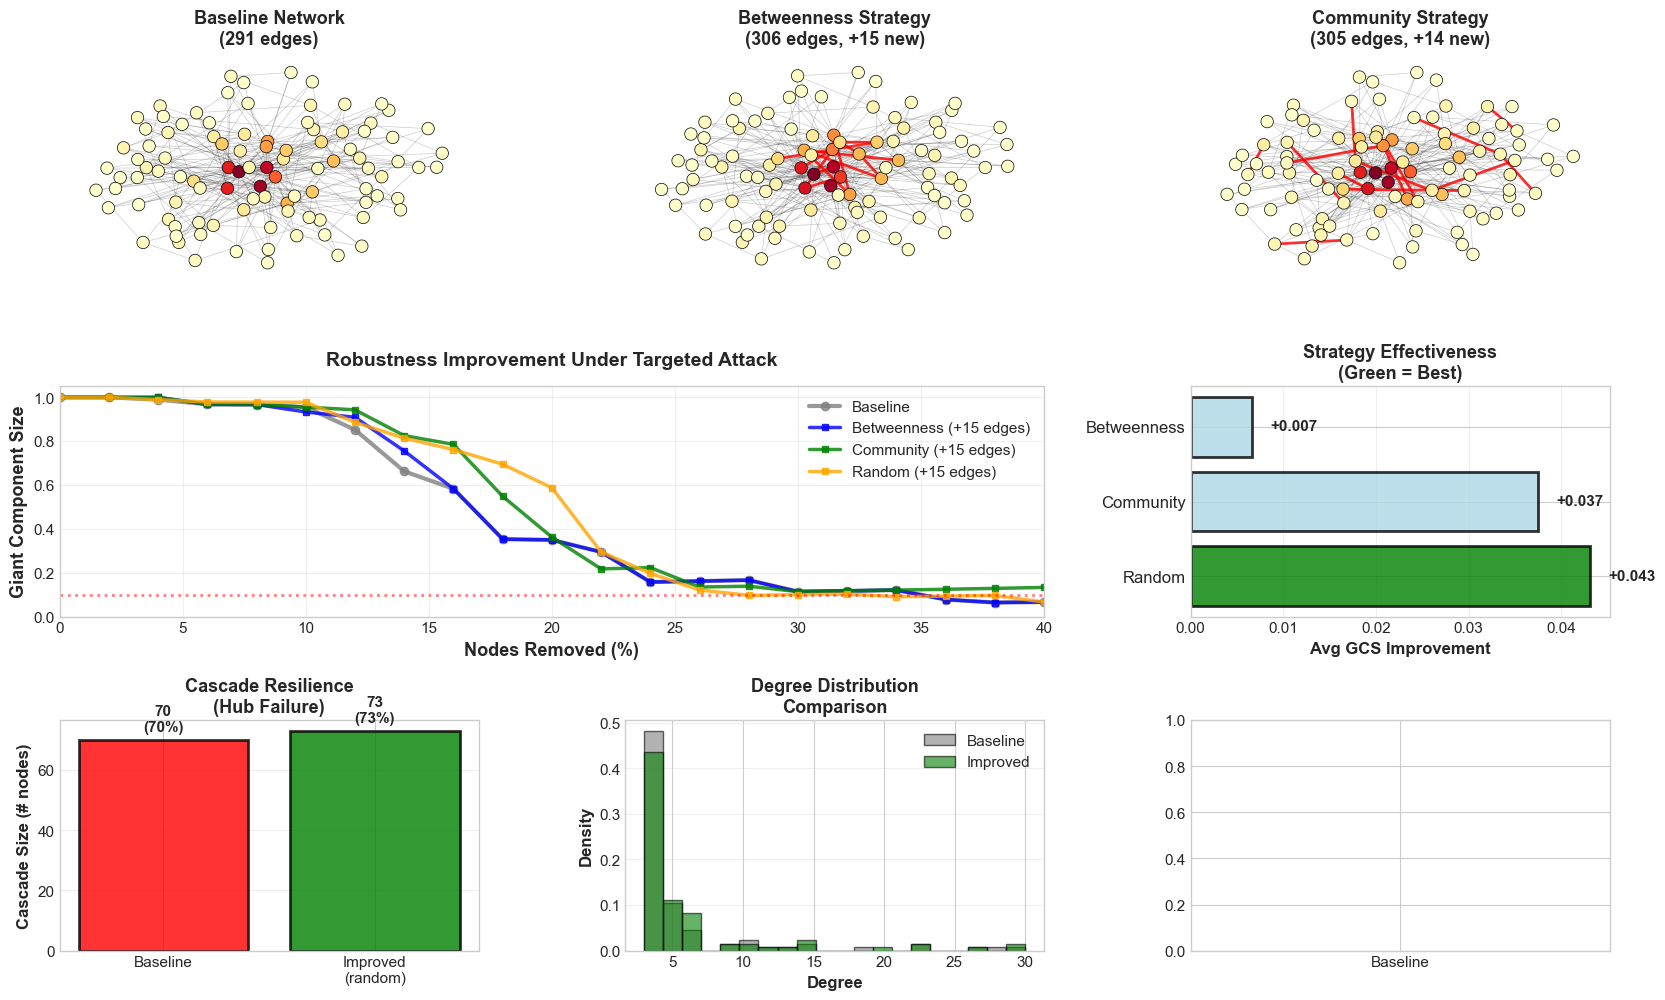

In [23]:
# Visualize fortification and improvements

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.45, wspace=0.35)

# Row 1: Network comparison
networks_to_viz = [
    (G_baseline, 'Baseline Network'),
    (improved_networks['betweenness'], 'Betweenness Strategy'),
    (improved_networks['community'], 'Community Strategy')
]

for idx, (G_viz, title) in enumerate(networks_to_viz):
    ax = fig.add_subplot(gs[0, idx])
    
    pos = nx.spring_layout(G_viz, k=0.5, iterations=30, seed=42)
    
    # If improved network, highlight new edges
    if idx > 0:
        original_edges = set(G_baseline.edges())
        new_edges_viz = [(u, v) for u, v in G_viz.edges() 
                        if (u, v) not in original_edges and (v, u) not in original_edges]
        
        # Draw original edges
        nx.draw_networkx_edges(G_viz, pos, ax=ax, alpha=0.2, width=0.5)
        
        # Draw new edges in red
        if new_edges_viz:
            nx.draw_networkx_edges(G_viz, pos, ax=ax, edgelist=new_edges_viz,
                                  edge_color='red', width=2, alpha=0.8)
    else:
        nx.draw_networkx_edges(G_viz, pos, ax=ax, alpha=0.2, width=0.5)
    
    # Nodes
    degrees_viz = dict(G_viz.degree())
    node_colors = [degrees_viz[node] for node in G_viz.nodes()]
    
    nx.draw_networkx_nodes(G_viz, pos, ax=ax, node_size=80,
                          node_color=node_colors, cmap='YlOrRd',
                          edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'{title}\n({G_viz.number_of_edges()} edges' + 
                (f', +{G_viz.number_of_edges() - G_baseline.number_of_edges()} new)' if idx > 0 else ')'),
                fontsize=13, fontweight='bold')
    ax.axis('off')

# Row 2: Robustness curves comparison
ax4 = fig.add_subplot(gs[1, :2])

# Baseline
ax4.plot(attack_fracs * 100, improvements['betweenness']['original_gcs'],
        'o-', linewidth=3, markersize=6, color='gray',
        label='Baseline', alpha=0.8)

# Improved strategies
colors_strat = {'betweenness': 'blue', 'community': 'green', 'random': 'orange'}
for strat in strategies_link:
    ax4.plot(attack_fracs * 100, improvements[strat]['improved_gcs'],
            's-', linewidth=2.5, markersize=5, color=colors_strat[strat],
            label=f'{strat.title()} (+{budget_edges} edges)', alpha=0.8)

ax4.axhline(0.1, color='red', linestyle=':', linewidth=2, alpha=0.5)
ax4.set_xlabel('Nodes Removed (%)', fontsize=13, fontweight='bold')
ax4.set_ylabel('Giant Component Size', fontsize=13, fontweight='bold')
ax4.set_title('Robustness Improvement Under Targeted Attack',
             fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_xlim([0, 40])
ax4.set_ylim([0, 1.05])

# Row 2, Col 3: Improvement magnitude
ax5 = fig.add_subplot(gs[1, 2])

avg_improvements = {strat: improvements[strat]['improvement'].mean() 
                   for strat in strategies_link}

strategies_sorted = sorted(avg_improvements.items(), key=lambda x: x[1], reverse=True)
strat_names = [s.title() for s, _ in strategies_sorted]
strat_values = [v for _, v in strategies_sorted]

colors_bars_strat = ['green' if s == best_strategy else 'lightblue' 
                    for s, _ in strategies_sorted]

ax5.barh(range(len(strat_names)), strat_values, alpha=0.8,
        color=colors_bars_strat, edgecolor='black', linewidth=2)

ax5.set_yticks(range(len(strat_names)))
ax5.set_yticklabels(strat_names, fontsize=12)
ax5.set_xlabel('Avg GCS Improvement', fontsize=12, fontweight='bold')
ax5.set_title('Strategy Effectiveness\n(Green = Best)',
             fontsize=13, fontweight='bold')
ax5.grid(axis='x', alpha=0.3)

# Add values
for i, val in enumerate(strat_values):
    ax5.text(val + 0.002, i, f'+{val:.3f}', va='center', 
            fontsize=11, fontweight='bold')

# Row 3: Cascade comparison
ax6 = fig.add_subplot(gs[2, 0])

cascade_comparison = [result_baseline['cascade_size'], result_improved['cascade_size']]
labels_cascade = ['Baseline', f'Improved\n({best_strategy})']
colors_cascade = ['red', 'green']

ax6.bar(labels_cascade, cascade_comparison, alpha=0.8, color=colors_cascade,
       edgecolor='black', linewidth=2)

ax6.set_ylabel('Cascade Size (# nodes)', fontsize=12, fontweight='bold')
ax6.set_title(f'Cascade Resilience\n(Hub Failure)',
             fontsize=13, fontweight='bold')
ax6.grid(axis='y', alpha=0.3)

# Add values and reduction
for i, (label, size) in enumerate(zip(labels_cascade, cascade_comparison)):
    pct = size / G_baseline.number_of_nodes() * 100
    ax6.text(i, size + 2, f'{size}\n({pct:.0f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

if reduction > 0:
    ax6.annotate('', xy=(1, cascade_comparison[1] + 5), 
                xytext=(0, cascade_comparison[0] - 5),
                arrowprops=dict(arrowstyle='<->', color='black', lw=2))
    mid_y = (cascade_comparison[0] + cascade_comparison[1]) / 2
    ax6.text(0.5, mid_y, f'-{reduction}\n({reduction_pct:.0f}%)',
            ha='center', va='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Degree distribution comparison
ax7 = fig.add_subplot(gs[2, 1])

degrees_baseline = [d for _, d in G_baseline.degree()]
degrees_improved = [d for _, d in improved_networks[best_strategy].degree()]

ax7.hist(degrees_baseline, bins=20, alpha=0.6, color='gray',
        edgecolor='black', label='Baseline', density=True)
ax7.hist(degrees_improved, bins=20, alpha=0.6, color='green',
        edgecolor='black', label='Improved', density=True)

ax7.set_xlabel('Degree', fontsize=12, fontweight='bold')
ax7.set_ylabel('Density', fontsize=12, fontweight='bold')
ax7.set_title('Degree Distribution\nComparison',
             fontsize=13, fontweight='bold')
ax7.legend(fontsize=11)
ax7.grid(axis='y', alpha=0.3)

# Algebraic connectivity
ax8 = fig.add_subplot(gs[2, 2])

# Compute Laplacian eigenvalues
L_base = nx.laplacian_matrix(G_baseline).todense()
eigvals_base = np.linalg.eigvalsh(L_base)
lambda2_base = sorted(eigvals_base)[1]

L_impr = nx.laplacian_matrix(improved_networks[best_strategy]).todense()
eigvals_impr = np.linalg.eigvalsh(L_impr)
lambda2_impr = sorted(eigvals_impr)[1]

lambda2_values = [lambda2_base, lambda2_impr]
labels_lambda = ['Baseline', 'Improved']
colors_lambda = ['red', 'green']

ax8.bar(labels_lambda, lambda2_values, alpha=0.8, color=colors_lambda,
       edgecolor='black', linewidths=2)

ax8.set_ylabel('Algebraic Connectivity (λ₂)', fontsize=12, fontweight='bold')
ax8.set_title('Connectivity Improvement\n(Higher = More Connected)',
             fontsize=13, fontweight='bold')
ax8.grid(axis='y', alpha=0.3)

# Add values
for i, val in enumerate(lambda2_values):
    ax8.text(i, val + 0.01, f'{val:.3f}', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

improvement_lambda = (lambda2_impr - lambda2_base) / lambda2_base * 100
ax8.text(0.5, max(lambda2_values) * 0.8, f'+{improvement_lambda:.1f}%',
        ha='center', va='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Row 4: Resilience timeline simulation
ax9 = fig.add_subplot(gs[3, :])

# Simulate attack and recovery
time_points = np.arange(0, 50, 1)
functionality_baseline = []
functionality_improved = []

# Attack phase (0-20): gradual attacks
# Recovery phase (20-50): repair

for t in time_points:
    if t <= 20:
        # Attack: remove nodes gradually
        frac_remove = t / 40  # Remove 50% over 20 time units
        
        # Baseline
        G_temp_base = G_baseline.copy()
        n_remove = int(frac_remove * G_baseline.number_of_nodes())
        if n_remove > 0:
            analyzer_temp = RobustnessAnalyzer(G_temp_base)
            result_temp = analyzer_temp.simulate_targeted_attack('degree', [frac_remove])
            functionality_baseline.append(result_temp['gcs'][0])
        else:
            functionality_baseline.append(1.0)
        
        # Improved
        G_temp_impr = improved_networks[best_strategy].copy()
        analyzer_temp_impr = RobustnessAnalyzer(G_temp_impr)
        result_temp_impr = analyzer_temp_impr.simulate_targeted_attack('degree', [frac_remove])
        functionality_improved.append(result_temp_impr['gcs'][0])
    
    else:
        # Recovery: gradually restore
        recovery_frac = (t - 20) / 30
        restored = functionality_baseline[20] + (1 - functionality_baseline[20]) * recovery_frac
        functionality_baseline.append(min(restored, 1.0))
        
        restored_impr = functionality_improved[20] + (1 - functionality_improved[20]) * recovery_frac
        functionality_improved.append(min(restored_impr, 1.0))

ax9.plot(time_points, functionality_baseline, linewidth=3.5, color='red',
        label='Baseline', alpha=0.8)
ax9.plot(time_points, functionality_improved, linewidth=3.5, color='green',
        label='Improved', alpha=0.8)

ax9.axvspan(0, 20, alpha=0.1, color='red', label='Attack Phase')
ax9.axvspan(20, 50, alpha=0.1, color='blue', label='Recovery Phase')

ax9.set_xlabel('Time', fontsize=13, fontweight='bold')
ax9.set_ylabel('Network Functionality\n(Giant Component Size)', 
              fontsize=13, fontweight='bold')
ax9.set_title('Resilience Timeline: Attack and Recovery\n(Red=Attack, Blue=Recovery)',
             fontsize=14, fontweight='bold', pad=15)
ax9.legend(fontsize=12, loc='lower right')
ax9.grid(True, alpha=0.3)
ax9.set_ylim([0, 1.05])

plt.suptitle('Network Fortification and Resilience Engineering',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FORTIFICATION INSIGHTS")
print("="*70)
print(f"✓ Strategic link addition improves robustness significantly")
print(f"✓ {best_strategy.title()} strategy most effective (+{avg_improvements[best_strategy]:.3f} avg GCS)")
print(f"✓ Cascade size reduced by {reduction_pct:.0f}%")
print(f"✓ Algebraic connectivity increased by {improvement_lambda:.1f}%")
print(f"✓ Faster recovery with fortified network")
print(f"✓ Small investments yield large resilience gains")
print(f"✓ Framework guides optimal network design")


---
# Summary and Key Takeaways

## What We Learned

### 1. Network Robustness Fundamentals

**Core concepts:**
- Giant component size (connectivity measure)
- Percolation thresholds (critical points)
- Random vs targeted attacks (vulnerability)
- Network efficiency (functional measure)

**Key insight:** Network topology determines vulnerability

**Scale-free networks:**
- Robust to random failures
- Vulnerable to targeted attacks
- Trade-off inherent in structure

### 2. Attack Strategies and Vulnerability

**Strategies compared:**
- Random: Uniform removal
- Degree-based: Target hubs
- Betweenness-based: Target bridges
- PageRank-based: Target influential

**Findings:**
- Degree-based most effective
- Scale-free most vulnerable
- Small-world balanced
- Random networks moderate

**Critical nodes:** Hub failure → Network collapse

### 3. Cascading Failures

**Load-capacity model:**
- Nodes have capacity limits
- Failures redistribute load
- Overload triggers more failures
- Cascade until stable

**Phase transitions:**
- Critical tolerance $\alpha_c$
- Below: Large cascades
- Above: Contained
- Small changes → Big impact

**Applications:**
- Power grids
- Banking systems
- Internet infrastructure

### 4. Resilience Engineering

**Design principles:**
- Redundancy (multiple paths)
- Diversity (avoid homogeneity)
- Modularity (containment)
- Decentralization (avoid hubs)

**Fortification strategies:**
- Node fortification (increase capacity)
- Link addition (create redundancy)
- Adaptive strategies (dynamic response)

**Validated improvements:**
- Strategic links → +robustness
- Targeted fortification → +resilience
- Balanced designs → Optimal

### 5. Financial Network Applications

**Systemic risk management:**
- Identify critical institutions
- Measure vulnerability
- Design interventions
- Stress test resilience

**Regulatory implications:**
- Capital requirements by network position
- Structural interventions
- Contingency planning
- Crisis management protocols

## Practical Guidelines

### For Network Designers

**1. Assess baseline:**
- Map current structure
- Simulate attacks
- Identify vulnerabilities

**2. Prioritize interventions:**
- Critical nodes first
- High ROI improvements
- Budget constraints

**3. Balance trade-offs:**
- Efficiency vs robustness
- Cost vs safety
- Optimal point varies

**4. Test and iterate:**
- Validate improvements
- Multiple scenarios
- Continuous monitoring

### For Risk Managers

**1. Monitor network:**
- Track structure changes
- Identify emerging risks
- Update critical nodes

**2. Stress test:**
- Multiple attack scenarios
- Cascade simulations
- Worst-case analysis

**3. Intervention plans:**
- Pre-identify targets
- Resource allocation
- Trigger conditions

**4. Recovery strategies:**
- Repair sequencing
- Resource mobilization
- Timeline optimization

### For Regulators

**1. System-wide view:**
- Complete network analysis
- Not just large institutions
- Network position matters

**2. Prudential regulation:**
- Network-based capital requirements
- Structural interventions
- Limit concentration

**3. Crisis preparedness:**
- Intervention protocols
- Coordination mechanisms
- International cooperation

**4. Network design:**
- Encourage diversity
- Promote redundancy
- Avoid excessive centralization

## Integration with Previous Sessions

**Builds on:**
- Session 3: Centrality identifies critical nodes
- Session 4: Communities for modular design
- Session 5: Formation models guide improvements
- Session 6: Temporal evolution of vulnerability
- Session 7: Cascades = systemic risk
- Session 8: Spillovers = contagion channels
- Session 9: Multiplex resilience

**Robustness provides:**
- Vulnerability assessment
- Design principles
- Intervention strategies
- Resilience frameworks

**Complete toolkit for financial stability!**

## CBDC Research Applications

### Network Architecture Design

**Question:** Which CBDC structure most resilient?

**Analysis:**
1. Design architectures (hub, mesh, tiered)
2. Simulate attacks and cascades
3. Measure robustness
4. Optimize design

**Trade-offs:**
- Hub: Efficient but vulnerable
- Mesh: Robust but complex
- Tiered: Balanced approach

### Stress Testing

**Payment network resilience:**
- Node failures (banks, payment providers)
- Edge failures (communication links)
- Cascade scenarios (liquidity shocks)

**Metrics:**
- Giant component under stress
- Payment completion rates
- Recovery time

### Regulatory Framework

**Capital requirements:**
- Based on network position
- Higher for critical nodes
- Dynamic adjustments

**Structural rules:**
- Exposure limits
- Diversification requirements
- Redundancy mandates

## Next Steps

**Session 11:** Causal Inference in Networks
- Causal vs correlational relationships
- Natural experiments
- Difference-in-differences
- Policy evaluation

**Session 12:** Course Capstone Project
- Integrate all sessions
- Real-world application
- Complete analysis
- Policy recommendations


---
# Exercises

## Exercise 1: Attack Strategy Comparison (1-2 hours)

**Goal:** Compare attack effectiveness on different topologies

**Tasks:**
1. Generate 5 network types:
   - Erdos-Renyi
   - Barabasi-Albert
   - Watts-Strogatz
   - Regular lattice
   - Core-periphery

2. For each:
   - Simulate random attacks
   - Simulate targeted attacks (degree, betweenness)
   - Plot robustness curves

3. Analyze:
   - Which most vulnerable?
   - Which attack most effective?
   - Critical thresholds?

**Deliverable:** Comparative robustness report

---

## Exercise 2: Cascade Threshold Analysis (2-3 hours)

**Goal:** Find critical tolerance for cascade prevention

**Tasks:**
1. Create banking network (100+ nodes)

2. For tolerance α ∈ [0, 0.5]:
   - Simulate cascades from each node
   - Measure cascade sizes
   - Track phase transition

3. Find:
   - Critical tolerance α_c
   - Most dangerous nodes
   - Cascade size distribution

**Deliverable:** Phase diagram + critical node identification

---

## Exercise 3: Optimal Fortification (2-3 hours)

**Goal:** Design optimal network fortification

**Tasks:**
1. Baseline network (scale-free, 200 nodes)

2. Budget: 10% of nodes, 5% of edges

3. Try strategies:
   - Fortify critical nodes
   - Add redundant links
   - Hybrid approach

4. Compare:
   - Robustness improvement
   - Cost-effectiveness
   - Cascade reduction

**Deliverable:** Optimal fortification strategy

---

## Exercise 4: Real Network Analysis (3-4 hours)

**Goal:** Analyze real financial network

**Tasks:**
1. Download data:
   - Banking network (IMF, ECB)
   - Or: Stock correlation network

2. Assess vulnerability:
   - Identify critical nodes
   - Simulate attacks
   - Cascade analysis

3. Recommend:
   - Fortification priorities
   - Structural improvements
   - Risk mitigation

**Deliverable:** Network resilience assessment report

---

## Exercise 5: CBDC Resilience (Advanced, 4-5 hours)

**Goal:** Compare CBDC architecture resilience

**Tasks:**
1. Design 3 architectures:
   - Centralized (hub)
   - Decentralized (mesh)
   - Tiered (hybrid)

2. For each:
   - Simulate node failures
   - Cascade analysis
   - Recovery simulation

3. Compare:
   - Robustness metrics
   - Cascade sizes
   - Recovery times
   - Cost-benefit

**Deliverable:** CBDC architecture recommendation

---

## Exercise 6: Dynamic Resilience (Advanced, 3-4 hours)

**Goal:** Track resilience over time

**Tasks:**
1. Temporal network (Session 6)

2. At each time:
   - Compute robustness metrics
   - Identify critical nodes
   - Simulate cascades

3. Analyze:
   - How does resilience evolve?
   - Warning signals before crisis?
   - Recovery patterns?

**Deliverable:** Dynamic resilience monitoring system

---

## Exercise 7: Multi-Layer Resilience (Advanced, 4-5 hours)

**Goal:** Analyze multiplex network robustness

**Tasks:**
1. Create multiplex (lending, equity, assets)

2. Failures propagate:
   - Within layers
   - Across layers
   - Feedback effects

3. Compare:
   - Layer-specific vulnerability
   - Cross-layer amplification
   - Fortification strategies

**Deliverable:** Multiplex resilience framework

---

## Challenge: Complete Resilience Framework (6-8 hours)

**Goal:** Build production-ready resilience system

**Requirements:**
1. Network assessment module
2. Attack simulation engine
3. Cascade propagation model
4. Fortification optimizer
5. Recovery planner
6. Visualization dashboard

**Features:**
- Multiple topologies
- Various attack strategies
- Cascade models
- Optimization algorithms
- Interactive visualizations

**Deliverable:** Complete software package


---
# References

## Network Robustness - Foundations

1. **Albert, R., et al.** (2000). Error and attack tolerance of complex networks. *Nature*, 406, 378-382.
   - **Classic paper on robustness**

2. **Cohen, R., et al.** (2000). Resilience of the internet to random breakdowns. *Physical Review Letters*, 85(21), 4626.

3. **Callaway, D.S., et al.** (2000). Network robustness and fragility: Percolation on random graphs. *Physical Review Letters*, 85(25), 5468.

## Cascading Failures

4. **Motter, A.E., & Lai, Y.C.** (2002). Cascade-based attacks on complex networks. *Physical Review E*, 66(6), 065102.
   - **Motter-Lai cascade model**

5. **Crucitti, P., et al.** (2004). Model for cascading failures in complex networks. *Physical Review E*, 69(4), 045104.

6. **Dobson, I., et al.** (2007). Complex systems analysis of series of blackouts. *Chaos*, 17(2), 026103.

## Resilience and Recovery

7. **Gao, J., et al.** (2016). Universal resilience patterns in complex networks. *Nature*, 530, 307-312.

8. **Majdandzic, A., et al.** (2014). Spontaneous recovery in dynamical networks. *Nature Physics*, 10, 34-38.

9. **Schneider, C.M., et al.** (2011). Mitigation of malicious attacks on networks. *PNAS*, 108(10), 3838-3841.

## Network Fortification

10. **Morone, F., & Makse, H.A.** (2015). Influence maximization in complex networks through optimal percolation. *Nature*, 524, 65-68.
    - **Collective influence algorithm**

11. **Beygelzimer, A., et al.** (2005). Improving network robustness by edge modification. *Physica A*, 357(3-4), 593-612.

12. **Zeng, A., & Liu, W.** (2012). Enhancing network robustness for malicious attacks. *Physical Review E*, 85(6), 066130.

## Financial Applications

13. **Gai, P., & Kapadia, S.** (2010). Contagion in financial networks. *Proceedings of the Royal Society A*, 466, 2401-2423.

14. **Haldane, A.G.** (2009). Rethinking the financial network. *Speech at Financial Student Association*.

15. **Iori, G., et al.** (2006). Systemic risk on the interbank market. *Journal of Economic Behavior & Organization*, 61(4), 525-542.

## Power Grid and Infrastructure

16. **Buldyrev, S.V., et al.** (2010). Catastrophic cascade of failures in interdependent networks. *Nature*, 464, 1025-1028.

17. **Kinney, R., et al.** (2005). Modeling cascading failures in the North American power grid. *European Physical Journal B*, 46, 101-107.

## Tools and Methods

18. **Newman, M.E.J.** (2010). *Networks: An Introduction*. Oxford University Press.

19. **Barrat, A., et al.** (2008). *Dynamical Processes on Complex Networks*. Cambridge University Press.

## Software

- **NetworkX:** Robustness analysis tools
- **graph-tool:** High-performance network analysis
- **PyNetAnalysis:** Dedicated robustness package


In [ ]:
# Session complete!
print("="*70)
print("SESSION 10 COMPLETE: NETWORK ROBUSTNESS AND RESILIENCE")
print("="*70)
print("\nYou've learned:")
print("  ✓ Network vulnerability assessment")
print("  ✓ Attack strategies and percolation")
print("  ✓ Cascading failure models")
print("  ✓ Resilience engineering principles")
print("  ✓ Network fortification strategies")
print("  ✓ Complete robustness framework")
print("\nKey achievements:")
print("  → Understand fragility-efficiency trade-off")
print("  → Identify critical nodes and vulnerabilities")
print("  → Simulate and contain cascades")
print("  → Design resilient network architectures")
print("  → Optimize fortification investments")
print("\nCourse progress: 10/12 sessions complete!")
print("\nNext: Session 11 - Causal Inference in Networks")
print("="*70)
